In [272]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model, metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


cars = pd.read_csv('car_price_prediction.csv')
cars.head(50)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7,45816158,549,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,216118 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
8,45641395,1098,394,TOYOTA,Camry,2014,Sedan,Yes,Hybrid,2.5,398069 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12


In [273]:
# analiza danych statystycznych
print(cars.describe())
print(cars.info())
print(cars.isnull().values.any())

                 ID         Price    Prod. year     Cylinders       Airbags
count  1.923700e+04  1.923700e+04  19237.000000  19237.000000  19237.000000
mean   4.557654e+07  1.855593e+04   2010.912824      4.582991      6.582627
std    9.365914e+05  1.905813e+05      5.668673      1.199933      4.320168
min    2.074688e+07  1.000000e+00   1939.000000      1.000000      0.000000
25%    4.569837e+07  5.331000e+03   2009.000000      4.000000      4.000000
50%    4.577231e+07  1.317200e+04   2012.000000      4.000000      6.000000
75%    4.580204e+07  2.207500e+04   2015.000000      4.000000     12.000000
max    4.581665e+07  2.630750e+07   2020.000000     16.000000     16.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy          

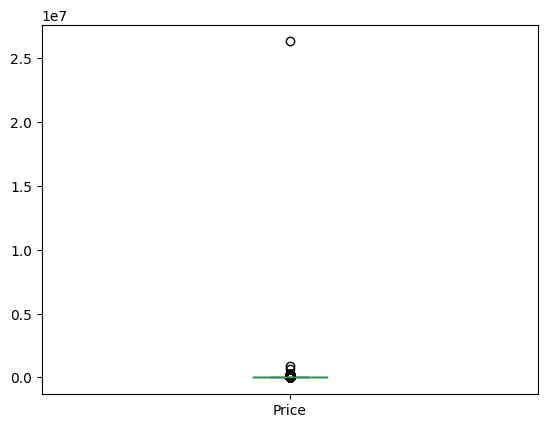

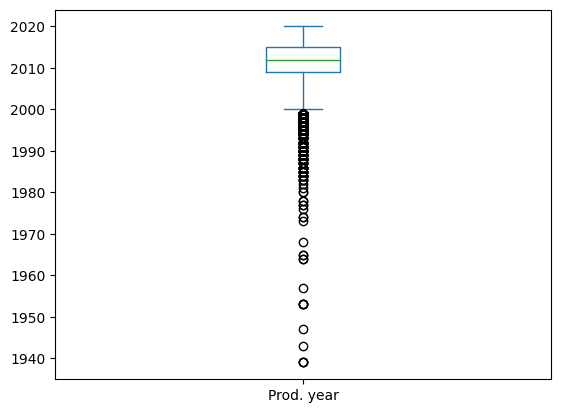

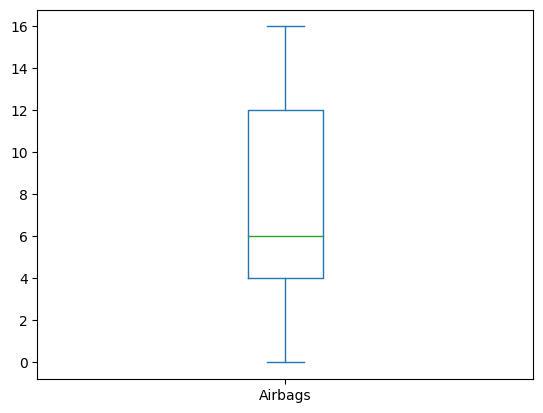

In [274]:
cars['Price'].plot(kind='box')
plt.show()
cars['Prod. year'].plot(kind='box')
plt.show()
cars['Airbags'].plot(kind='box')
plt.show()


In [275]:
cars = cars.replace('-', 0)
cars


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [276]:
cars['Levy'] = cars['Levy'].astype(float)
cars['Engine volume'] = cars['Engine volume'].map(
    lambda x: x.replace('Turbo', ''))
cars['Engine volume'] = cars['Engine volume'].astype(float)
cars


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [277]:
cars = cars.drop(cars[cars['Price'] > 600000].index)
cars = cars.drop(cars[cars['Prod. year'] < 1960].index)
cars = cars.drop(cars[cars['Levy'] > 7000].index)
cars = cars.drop(cars[cars['Engine volume'] > 10].index)


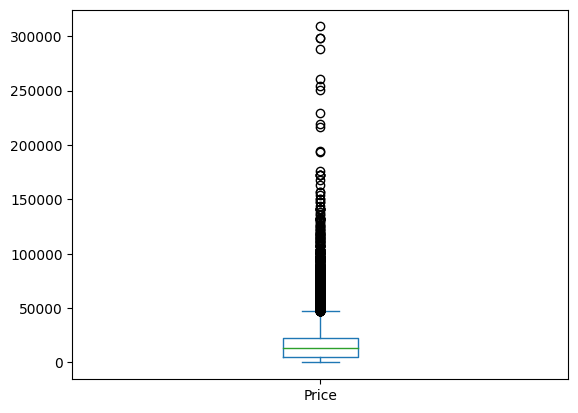

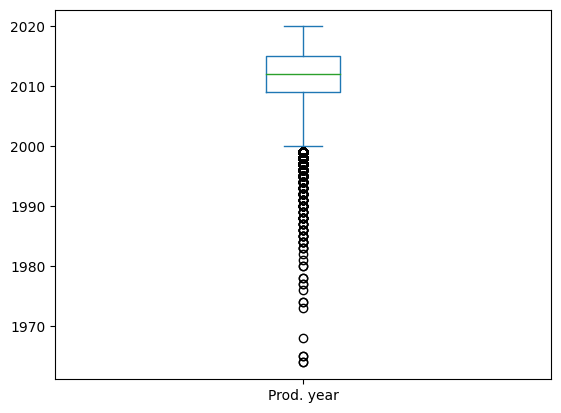

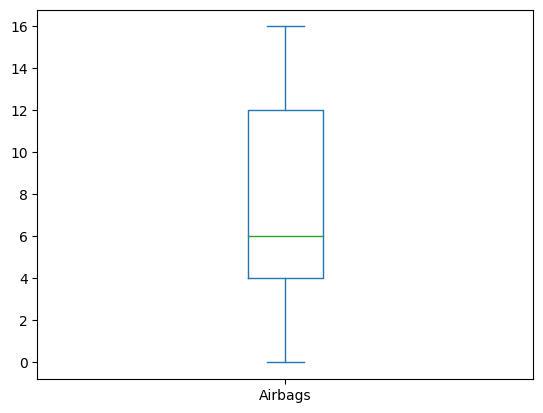

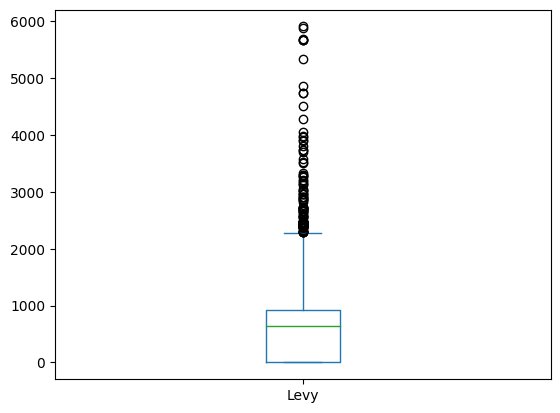

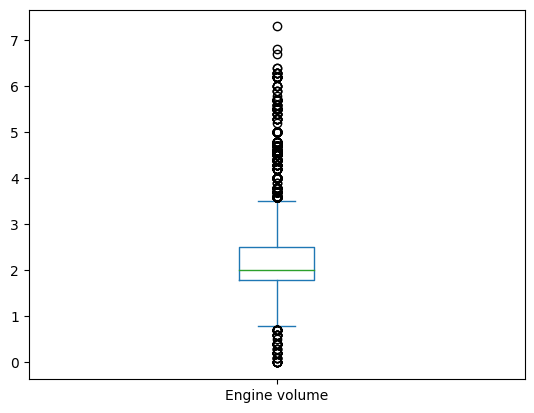

In [278]:
cars['Price'].plot(kind='box')
plt.show()
cars['Prod. year'].plot(kind='box')
plt.show()
cars['Airbags'].plot(kind='box')
plt.show()
cars['Levy'].plot(kind='box')
plt.show()
cars['Engine volume'].plot(kind='box')
plt.show()


In [279]:
# Usunięcie niepotyrzebnych danych
del cars['ID']
del cars['Model']
del cars['Wheel']
del cars['Color']
del cars['Doors']
cars.head()


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,12
1,16621,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,8
2,8467,0.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,2
3,3607,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,0
4,11726,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,4


In [280]:

le = preprocessing.LabelEncoder()
le.fit(cars['Manufacturer'])
cars['Manufacturer'] = le.transform(cars['Manufacturer'])
le.fit(cars['Category'])
cars['Category'] = le.transform(cars['Category'])
le.fit(cars['Fuel type'])
cars['Fuel type'] = le.transform(cars['Fuel type'])
le.fit(cars['Gear box type'])
cars['Gear box type'] = le.transform(cars['Gear box type'])
le.fit(cars['Drive wheels'])
cars['Drive wheels'] = le.transform(cars['Drive wheels'])

cars['Leather interior'] = cars['Leather interior'].map(
    lambda x: x == 'Yes' and 1 or 0)
cars['Mileage'] = cars['Mileage'].map(
    lambda x: x.replace(' km', '')).astype(float) / 100000
cars


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Airbags
0,13328,1399.0,31,2010,4,1,2,3.5,1.86005,6.0,0,0,12
1,16621,1018.0,8,2011,4,0,5,3.0,1.92000,6.0,2,0,8
2,8467,0.0,21,2006,3,0,5,1.3,2.00000,4.0,3,1,2
3,3607,862.0,16,2011,4,1,2,2.5,1.68966,4.0,0,0,0
4,11726,446.0,21,2014,3,1,5,1.3,0.91901,4.0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,35,1999,1,1,0,2.0,3.00000,4.0,1,2,5
19233,15681,831.0,23,2011,9,1,5,2.4,1.61600,4.0,2,1,8
19234,26108,836.0,23,2010,4,1,1,2.0,1.16365,4.0,0,1,4
19235,5331,1288.0,8,2007,4,1,1,2.0,0.51258,4.0,0,1,4


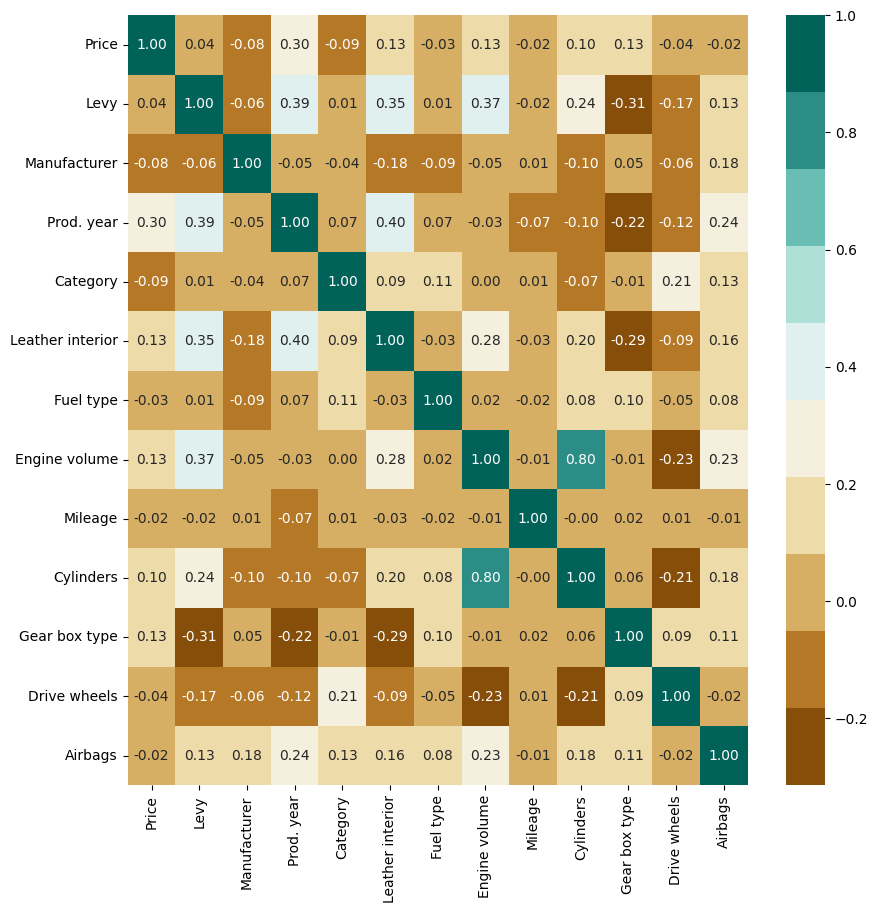

In [281]:
# wyznaczenie macierzy korelacji

correlations = cars.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations,
            cmap=colormap,
            annot=True,
            fmt=".2f")

plt.show()


In [282]:
# zbiór danych
cars = shuffle(cars)
X = cars.drop('Price', axis=1).to_numpy()
X


array([[0.000e+00, 3.500e+01, 2.007e+03, ..., 2.000e+00, 2.000e+00,
        8.000e+00],
       [7.700e+02, 2.300e+01, 2.016e+03, ..., 0.000e+00, 1.000e+00,
        4.000e+00],
       [3.820e+02, 2.300e+01, 2.014e+03, ..., 2.000e+00, 1.000e+00,
        1.000e+01],
       ...,
       [5.310e+02, 2.300e+01, 2.012e+03, ..., 0.000e+00, 1.000e+00,
        4.000e+00],
       [6.960e+02, 2.300e+01, 2.013e+03, ..., 0.000e+00, 1.000e+00,
        4.000e+00],
       [1.246e+03, 1.600e+01, 2.008e+03, ..., 0.000e+00, 0.000e+00,
        6.000e+00]])

In [283]:
# zbiór etykiet
y = cars.loc[:, 'Price'].to_numpy()
y


array([16935, 45210,   204, ..., 20209, 46919, 12544])

In [284]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [285]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
  # trenuj model
  classifier.fit(feature_vector_train, label)

  # wygeneruj przewidywania modelu dla zbioru testowego
  predictions = classifier.predict(feature_vector_valid)

  # dokonaj ewaluacji modelu na podstawie danych testowych
  score_vals = [
      metrics.mean_squared_error(predictions, y_test),
      metrics.mean_absolute_error(predictions, y_test)
  ]
  return score_vals


In [286]:
# MODEL 1 - regresja liniowa
from sklearn.ensemble import RandomForestRegressor
accuracy = train_model(
    linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print('random forrest tree', accuracy)


LR:  [238864694.38721314, 10737.567686897142]
random forrest tree [69898721.43378474, 4323.516597477065]


<AxesSubplot: >

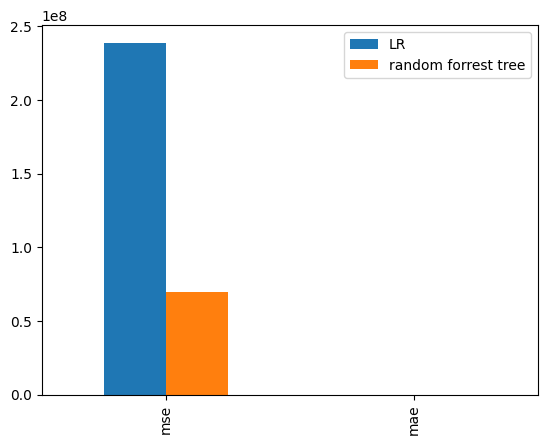

In [287]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index=['mse', 'mae'])
df_compare.plot(kind='bar')


In [288]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=400, random_state=42)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print('random forrest tree', accuracy)


random forrest tree [70595666.82913817, 4343.609261599428]


In [289]:
# test manualny
# prawidłowa wartość 18480
regressor.predict([[0, 50, 2019, 3, 0, 5, 1.5, 6.7, 4, 1, 1, 7]])


array([21353.72])

In [290]:
import pickle

with open('dwarf_classifier_model.pickle', 'wb') as handle:
    pickle.dump(regressor, handle)
